# 전처리

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./data/train.csv')


In [5]:
df.info()   # non-null: 이상치 없음음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [6]:
df.describe() 

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.00000,10000.000000,10000.000000
mean,2.163959e+06,0.199300,12.248900,19.879360,1.175265e+06,0.62620,30.889200,0.373200,5.061200e+05,3.649126e+05,22367.28075,744.215000,0.341200
std,1.434430e+06,0.714304,4.620572,7.206693,1.604199e+06,1.23419,20.011561,0.843797,2.831462e+05,3.537942e+05,15186.49738,56.995698,0.474136
min,2.676210e+05,0.000000,2.000000,6.000000,0.000000e+00,0.00000,0.000000,0.000000,2.917650e+04,0.000000e+00,0.00000,502.000000,0.000000
25%,1.311437e+06,0.000000,9.000000,14.600000,4.482476e+05,0.00000,14.000000,0.000000,3.001901e+05,1.471856e+05,10893.75000,704.000000,0.000000
50%,1.743223e+06,0.000000,12.000000,17.950000,7.670910e+05,0.00000,28.000000,0.000000,4.743412e+05,2.547930e+05,20160.00000,756.000000,0.000000
75%,2.447664e+06,0.000000,15.000000,24.100000,1.147283e+06,1.00000,41.000000,0.000000,5.919079e+05,4.749180e+05,30647.25000,793.000000,1.000000
max,1.722975e+07,7.000000,35.000000,51.700000,2.323233e+07,7.00000,88.000000,3.000000,1.373613e+06,3.946300e+06,153574.50000,825.000000,1.000000


In [7]:
Y = df['채무 불이행 여부']
X = df.drop('채무 불이행 여부', axis=1)

print(X)

              UID            주거 형태      연간 소득  ... 현재 미상환 신용액  월 상환 부채액  신용 점수
0     TRAIN_00000               자가  1941337.5  ...   225457.5    8806.5    767
1     TRAIN_00001               월세  1979505.0  ...    64749.0   24961.5    767
2     TRAIN_00002               월세  1356381.0  ...   487644.0   12069.0    800
3     TRAIN_00003               월세  1049017.5  ...   413211.0   31749.0    796
4     TRAIN_00004               월세  4320217.5  ...    78991.5    5862.0    751
...           ...              ...        ...  ...        ...       ...    ...
9995  TRAIN_09995  주택 담보 대출 (거주 중)  1339473.0  ...   177028.5    6237.0    755
9996  TRAIN_09996  주택 담보 대출 (거주 중)  2297230.5  ...   347449.5   53301.0    707
9997  TRAIN_09997  주택 담보 대출 (거주 중)  1221523.5  ...   176905.5   11436.0    733
9998  TRAIN_09998               자가  3343584.0  ...   139294.5   25567.5    696
9999  TRAIN_09999  주택 담보 대출 (거주 중)  2175133.5  ...   106930.5   12676.5    676

[10000 rows x 17 columns]


### Normal Distribute 시각화
- 고른 분포
- 이상치 판별 어려움

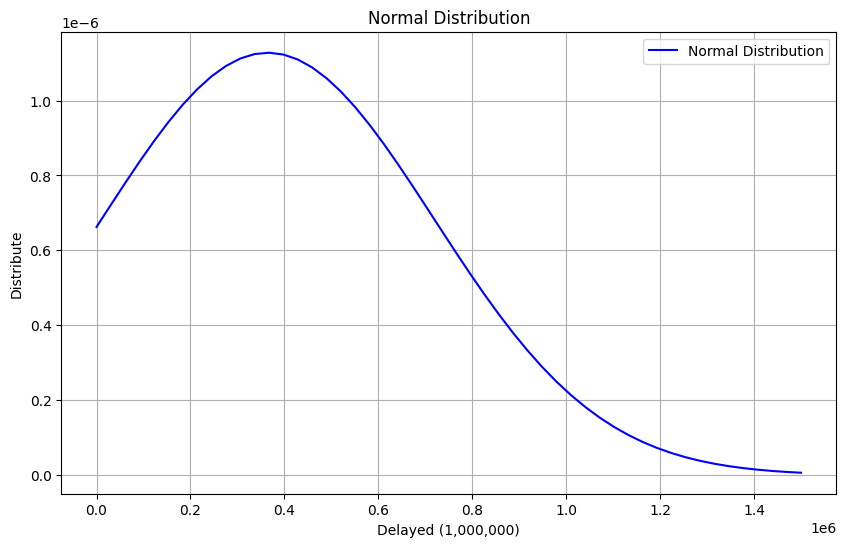

In [8]:
from scipy.stats import norm
X2 = df['현재 미상환 신용액']

mu = X2.sum() / len(X2)  # 평균
sigma = X2.std()  # 표준편차

# x 축의 값 범위 설정
x = np.linspace(0, 1500000)

# 확률 밀도 함수 계산
y = norm.pdf(x, loc=mu, scale=sigma)
# y = amount

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.title('Normal Distribution')
plt.xlabel('Delayed (1,000,000)')
plt.ylabel('Distribute')
plt.grid(True)
plt.legend()
plt.show()


### IQR 그래프
- 현재 대출 잔액	
- 현재 미상환 신용액	
- 월 상환 부채액	

In [9]:
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font)

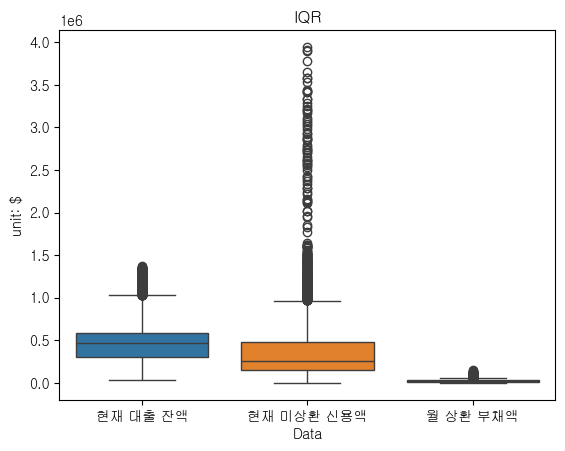

In [10]:
box_plot = sns.boxplot(data=df[['현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액']])
for patch in box_plot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
    x = patch.get_x()
    y = patch.get_y()
    width = patch.get_width()
    height = patch.get_height()
    box_plot.text(x+width/2, y+height/2, "{:.2f}".format(height), ha='center', va='center')
plt.title('IQR')
plt.xlabel('Data')
plt.ylabel('unit: $')

plt.show()


### 히트맵
- 큰 상관관계의 데이터 없음 -> 데이터 칼럼 안 묶어도 됨

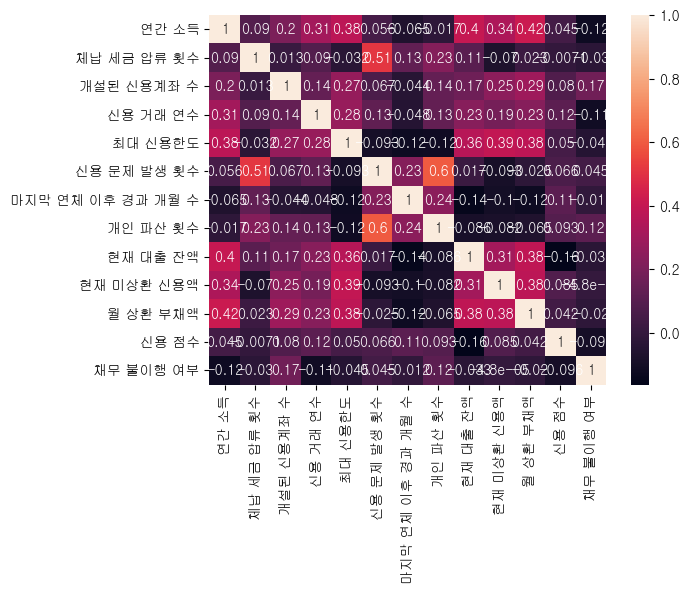

In [11]:
corr_matrix = df.corr(numeric_only = True) # 컬럼들 간의 상관관계 - 피어슨의 상관계수 / numeric_only : 숫자형 데이터만 사용
corr_matrix

sns.heatmap(corr_matrix, annot=True) # 히트맵
plt.show()

# 전처리

- 라벨 인코딩
- '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액' : 금액이므로 다른 데이터들에 비해 값이 큼, 로그치환/정규화 필요?

In [12]:
# X 라벨 인코딩

from sklearn.preprocessing import LabelEncoder
def encode_feature(df):
    
    categories = ['주거 형태', '현재 직장 근속 연수', '대출 목적', '대출 상환 기간']
    for cate_item in categories:
        label_encoder = LabelEncoder()
        df[cate_item] = label_encoder.fit_transform(df[cate_item])
    
    return df
    
encode_feature(X)
print(X)


              UID  주거 형태      연간 소득  ...  현재 미상환 신용액  월 상환 부채액  신용 점수
0     TRAIN_00000      1  1941337.5  ...    225457.5    8806.5    767
1     TRAIN_00001      0  1979505.0  ...     64749.0   24961.5    767
2     TRAIN_00002      0  1356381.0  ...    487644.0   12069.0    800
3     TRAIN_00003      0  1049017.5  ...    413211.0   31749.0    796
4     TRAIN_00004      0  4320217.5  ...     78991.5    5862.0    751
...           ...    ...        ...  ...         ...       ...    ...
9995  TRAIN_09995      2  1339473.0  ...    177028.5    6237.0    755
9996  TRAIN_09996      2  2297230.5  ...    347449.5   53301.0    707
9997  TRAIN_09997      2  1221523.5  ...    176905.5   11436.0    733
9998  TRAIN_09998      1  3343584.0  ...    139294.5   25567.5    696
9999  TRAIN_09999      2  2175133.5  ...    106930.5   12676.5    676

[10000 rows x 17 columns]


In [21]:
# # '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액' 정규 분포화 : 다른 컬럼에 비해 너무 큰 값

# from scipy import stats
# columns = ['현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액']
# for column in columns:
#     tran_data, lambda_value = stats.boxcox(X[column])
#     X[f'{column}_boxcox'] = tran_data

cl = ['현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액']
# print(X)
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

for i in cl:
    df[i] = std_scaler.fit_transform(df[[i]])

df


,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,-0.142308,0.086233,-0.144919,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1.389104,-0.240266,0.236443,767,0
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,-1.068459,0.273157,-0.025557,800,1
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,-0.896578,0.233902,0.319406,796,1
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1.622471,-0.186036,-0.304704,751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TRAIN_09995,주택 담보 대출 (거주 중),1339473.0,10년 이상,0.0,9,18.7,319027.5,0,68,0,부채 통합,단기 상환,-2.124714,0.025406,-0.279931,755,0
9996,TRAIN_09996,주택 담보 대출 (거주 중),2297230.5,2년,0.0,11,28.3,399799.5,0,7,0,주택 개보수,장기 상환,-0.226208,0.192317,0.492301,707,0
9997,TRAIN_09997,주택 담보 대출 (거주 중),1221523.5,10년 이상,0.0,9,30.1,823305.0,0,14,0,부채 통합,장기 상환,1.164868,0.025229,-0.045703,733,0
9998,TRAIN_09998,자가,3343584.0,10년 이상,0.0,10,20.3,724314.0,0,25,0,부채 통합,단기 상환,0.067114,-0.036013,0.244797,696,0


In [20]:
# 원 핫 인코딩
categories = ['주거 형태', '현재 직장 근속 연수', '대출 목적', '대출 상환 기간']


df_dummies = pd.get_dummies(df, columns = categories, dtype=int) 

df_dummies

,UID,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부,주거 형태_월세,주거 형태_자가,주거 형태_주택 담보 대출 (거주 중),주거 형태_주택 담보 대출 (비거주 중),현재 직장 근속 연수_10년 이상,현재 직장 근속 연수_1년,현재 직장 근속 연수_1년 미만,현재 직장 근속 연수_2년,현재 직장 근속 연수_3년,현재 직장 근속 연수_4년,현재 직장 근속 연수_5년,현재 직장 근속 연수_6년,현재 직장 근속 연수_7년,현재 직장 근속 연수_8년,현재 직장 근속 연수_9년,대출 목적_결혼 자금,대출 목적_고액 구매,대출 목적_교육비,대출 목적_기타,대출 목적_부채 통합,대출 목적_사업 대출,대출 목적_소규모 사업 자금,대출 목적_여행 자금,대출 목적_의료비,대출 목적_이사 비용,대출 목적_자동차 구매,대출 목적_주택 개보수,대출 목적_주택 구매,대출 목적_휴가 비용,대출 상환 기간_단기 상환,대출 상환 기간_장기 상환
0,TRAIN_00000,1941337.5,0.0,9,13.4,400597.5,0,24,1,2.630176,2.589709,2.310886,767,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,TRAIN_00001,1979505.0,0.0,5,15.1,360679.5,0,11,0,2.695822,2.491410,2.409207,767,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,TRAIN_00002,1356381.0,0.0,12,18.8,491770.5,1,74,3,2.590476,2.645986,2.341659,800,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,TRAIN_00003,1049017.5,0.0,15,14.8,411546.0,1,22,1,2.597844,2.634168,2.430595,796,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,TRAIN_00004,4320217.5,0.0,11,26.1,895288.5,0,32,0,2.705825,2.507736,2.269692,751,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TRAIN_09995,1339473.0,0.0,9,18.7,319027.5,0,68,0,2.545199,2.571396,2.276078,755,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9996,TRAIN_09996,2297230.5,0.0,11,28.3,399799.5,0,7,0,2.626580,2.621648,2.475170,707,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9997,TRAIN_09997,1221523.5,0.0,9,30.1,823305.0,0,14,0,2.686210,2.571342,2.336466,733,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
9998,TRAIN_09998,3343584.0,0.0,10,20.3,724314.0,0,25,0,2.639154,2.552904,2.411360,696,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [16]:
# 로그
cl = ['현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액']

for i in cl:
    df[i] = df[i].apply(lambda x: np.log1p(x))

df

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,2.630176,2.589709,2.310886,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,2.695822,2.491410,2.409207,767,0
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,2.590476,2.645986,2.341659,800,1
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,2.597844,2.634168,2.430595,796,1
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,2.705825,2.507736,2.269692,751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TRAIN_09995,주택 담보 대출 (거주 중),1339473.0,10년 이상,0.0,9,18.7,319027.5,0,68,0,부채 통합,단기 상환,2.545199,2.571396,2.276078,755,0
9996,TRAIN_09996,주택 담보 대출 (거주 중),2297230.5,2년,0.0,11,28.3,399799.5,0,7,0,주택 개보수,장기 상환,2.626580,2.621648,2.475170,707,0
9997,TRAIN_09997,주택 담보 대출 (거주 중),1221523.5,10년 이상,0.0,9,30.1,823305.0,0,14,0,부채 통합,장기 상환,2.686210,2.571342,2.336466,733,0
9998,TRAIN_09998,자가,3343584.0,10년 이상,0.0,10,20.3,724314.0,0,25,0,부채 통합,단기 상환,2.639154,2.552904,2.411360,696,0
